# Predicting Diagnosis of Heart Disease in a Patient

## MATH2319 - Machine Learning


## Course Project

Team details:  
**Group 51**  
Aditi Mahajan (s3757732)  
Neha Rao (s3755214)  
Archit Sharma (s3755732)

# Table of Contents

The report is indexed as follows
- [Overview & Objective](#over) - A summary about the objective and the dataset
- [Methodology](#method) - gives an outline of the procedure followed
- [Data Processing](#dataprep) - Includes data cleaning and data preparation for ML methods
- [Data Visualization](#dv) - Exploring the data and understanding relations between the variables
- [Feature Selection and Ranking](#fs) - Feature Selection and Ranking
- [Data Splitting – Train Test ](#dsplit) - Splitting the Data into train and test
- [Predictive Modeling and Hyperparameter Tuning](#pml) - Fitting classification models and Fine-tuning the parameters
- [Performance Evaluation](#pe) - Evaluating the model with best results (Using Paired T-test)
- [Summary and Limitations](#sl) - Conclusion 
- [References](#rf) 
  
The project uses Python 3.6 and is compiled from Jupyter Notebook. It shows both the analyses undertaken and the code used.

# Overview <a name="over"></a>

In medical science and healthcare service industry, predicting the health and a person's vulnerability to diseases can make the difference for the life of death for the person. Especially for high risk diseases such as a heart disease which may be fatal, foreseeing a patient's vulnerability to it, is quite vital. Predicting the presence of heart disease in an individual prompts the doctors to provide appropriate healthcare services and gives them an opportunity to adapt their treatment based on the prediction, thereby saving patient's lives. 
  
This project focuses on predicting such condition. We use the subset database, Cleveland database, consisting of 14 out the 76 features from the original database. Most of the published experiments done by researchers, make use of the specified subset of 14 features.



# Objective
  
This project aims to predict the presence of a cardiovascular(heart) disease in a patient within acceptable margin of error using different binary classifiers 

## Source of Data

The data taken from the repository of Kaggle at https://www.kaggle.com/ronitf/heart-disease-uci . 
The dataset includes 13 descriptive features and 1 target feature and a total of 303 observations. The descriptive features have 5 numerical and 9 categorical features. 


## Data Description

The description and data types of each descriptive feature is mentioned below
1. `Age`: continuous
2. `Sex`: 0 : Female, 1 : Male
3. `cp`: Type of Chest Pains; 0 : Asymptomatic, 1 : Atypical Angina, 2 : Non-Anginal, 3:Typical Angina
4. `trestbps`: numeric, Resting Blood pressure (in mm Hg on admission to the hospital)
5. `chol`: numeric, serum cholesterol in mg/dl
6. `fbs`:  fasting blood sugar; 0 : Less than equal to 120 mg/dl, 1 : Greater than 120 mg/dl
7. `restecg`:resting electrocardiographic results;  
    0 : Normal, 1 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),  2 : showing probable or definite left ventricular hypertrophy by Estes' criteria

8. `thalach`: numeric, maximum heart rate achieved
9. `exang`: Exercise induced angina; 0: No, 1: Yes
10. `oldpeak`: numeric, ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment; 0: downsloping, 1: flat , 2 : upsloping
12. `ca`: number of major vessels (0-3) colored by flourosopy; 0:'0',1:'1',2:'2',3:'3', 4:'4'
13. `thal`:  0 : missing , 1 : fixed defect , 2 : normal  , 3 : reversible defect 


## Target Feature
The target field refers to the target feature which identifies whether the patient has a heart disease or not. The target feature is binary with value 0 marking absence of the disease and with 1 indicating its presence. Therefore, this objective is a classification problem.

# Methodology<a name="method"></a>

For predicting the binary target feature, we consider the following classifiers
K-Nearest Neighbors (KNN),
Decision trees (DT), and
Naive Bayes (NB)
Random Forest
Support Vector Machine

Before modeling, we understand more about the dataset by visualizing the data. The numerical features are converted to the categorical with the respective levels they represent. Also, the outliers are removed from the dataset as omitting outliers still leaves us with 284 values which are currently sufficient to perform Machine learning. After exploring the dataset, the dataset is transformed and the categorical features are encoded to numerical using 'one-hot encoding' for nominal and 'integer' encoding. Since our dataset is quite small, we use the complete dataset with 284 observations and split this into training and test data sets in 70:30 ratio. 

- 198 observation rows are considered as training data to help tune the hyperparameters while modeling
- Remaining 86 rows of data is considered as test data used to evaluating the performance of the models and parameters

After label encoding we have 25 features, so we select the best features using the Random Forest Importance method. We consider 5, 10 and complete set of features. This is done as part of pipeline. The pipeline also has search for the best parameters for the respective classifiers.Classification Accuracy:
which measures how often the classifier/model makes the correct prediction is used as the first scoring metric to make comparison amongst the classifiers, the final performance is measured using the 'Recall' metric. This is because predicting a 'false Positive' i.e. having a heart disease is less costlier than the model not catching a heart disease positively at all which maybe fatal to the patient.For fine-tuning the parameters cross validation is done with 5 fold with 3 repetitions.
With the help of plots hyperparameters are fine tuned and identified using the grid search method on the training data. Then we fit the classifiers with the best parameters on the test data using 5-fold cross-validation. This is done in pairs to perform t-test and help evaluate if difference in performance of different models are statistically significant. Comparing the recall values we decide the most suitable classifier for the prediction.

# Data Processing <a name="dataprep"></a>

### Importing the libraries and the dataset
Importing the necessary libraries for the project

In [1]:
# Set a seed value
seed_value = 999 
# 1. Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)
# 3. Initialise Numpy's pseudo-random generator
import numpy as np
np.random.seed(seed_value)

In [2]:
# Suppressing the warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing numpy with usual convention of np
import numpy as np
# Importing pandas with usual convention of pd
import pandas as pd
# Importing altair with usual convention of alt
import altair as alt
# Importing seaborn with usual convention of sns
import seaborn as sns
# Importing matplotlib with usual convention of plt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection as fs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

In [4]:
#%%capture
#$!pip install --upgrade altair
#!pip install vega vega_datasets

In [5]:
# Specifying the attribute names 
attributeNames = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
# Read in data
heart = pd.read_csv('S3755214_Data.csv',names = attributeNames, header = None,skiprows=1)
# Displaying first 5 rows of the data
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print(f"Shape of the dataset is {heart.shape} \n")

Shape of the dataset is (303, 14) 



## Cleaning and Transformation
### Checking for Missing Values

In [7]:
print(f"\nNumber of missing values for each feature in the dataset is given below:")
print(heart.isnull().sum())


Number of missing values for each feature in the dataset is given below:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


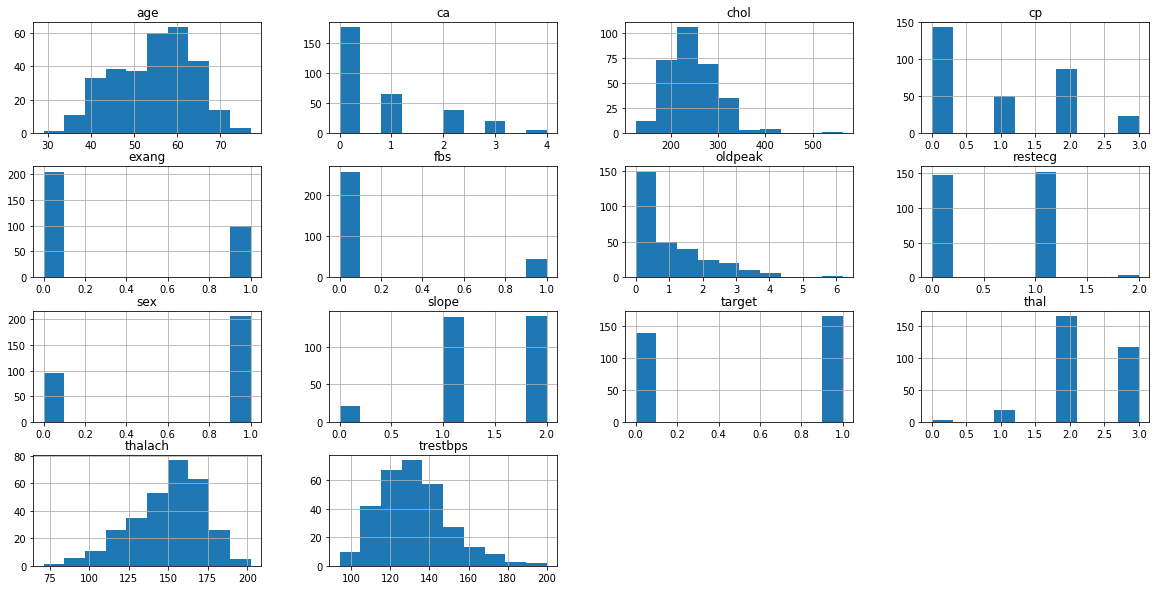

In [8]:
_ = heart.hist(figsize=(20, 10))

We view the complete dataset as from the histogram plot. The features which have discrete bars should be categorical features but currently are numeric features. Moreover, it is observed that the features have different ranges, thereby requiring scaling.  
  
** Verifying the Datatypes**

In [9]:
print(f"Shape of the dataset is {heart.shape} \n")
print(f"Data types of each feature in the dataset is displayed below: ")
print(heart.dtypes)

Shape of the dataset is (303, 14) 

Data types of each feature in the dataset is displayed below: 
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


Descriptive features `sex`,`cp`,`fbs`,`restecg`,`exang`,`slope`,`ca`,`thal`,`target` are categorical features but represented as numeric features in the dataset. We convert them to categorical type of data.

In [10]:
# Converting necessary Numeric Features to Categorical Features for Visualization
heart[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']] = heart[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']].astype(object)

## Outlier Detection and Removal

We check for outliers in the numeric descriptive features

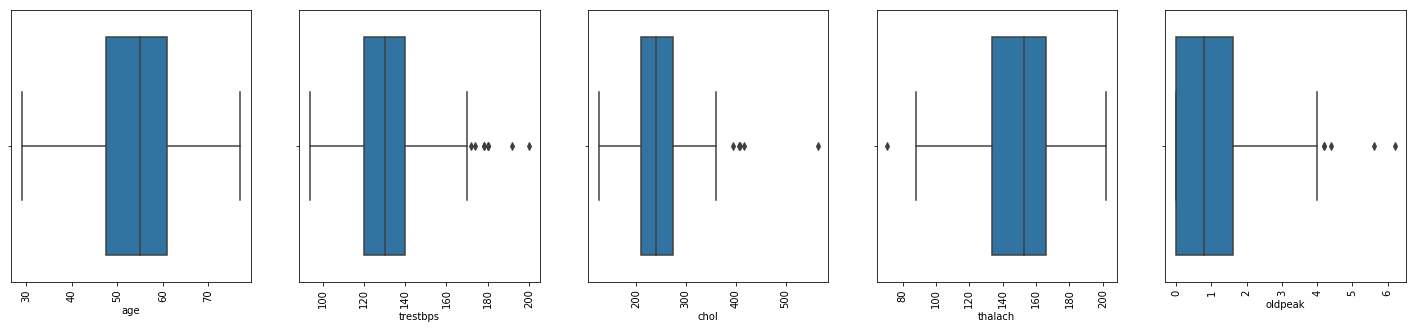

In [11]:
# Boxplot of all numerical features to determine the number of outliers 
numerical=['age','trestbps','chol','thalach','oldpeak']
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(heart[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [12]:
# Dealing with outliers
Q1 = heart.quantile(0.25)
Q3 = heart.quantile(0.75)
IQR = Q3 - Q1
heart_clean = heart[~((heart < (Q1 - 1.5 * IQR)) |(heart > (Q3 + 1.5 * IQR))).any(axis=1)]
heart_new=pd.DataFrame(data=heart_clean)
type(heart_new)
heart_new.shape

(284, 14)

As observed from the boxplot display of numeric features, there are few outliers present. The outliers are treated by removing observations. The number of outlier observations are very low, therefore, we remove them. The remaining dataset with 284 observations is still enough to perform machine learning algorithms. 

## Summary Statistics of the treated Data

In [13]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
heart_new.describe(include=[np.number])

,age,trestbps,chol,thalach,oldpeak
count,284.000000,284.000000,284.000000,284.000000,284.000000
mean,53.992958,129.911972,242.077465,150.042254,0.948592
std,9.161678,15.368133,44.753834,22.692716,1.026141
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,46.750000,120.000000,209.750000,133.750000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000
75%,60.000000,140.000000,270.250000,168.000000,1.600000
max,77.000000,170.000000,360.000000,202.000000,4.000000


In [14]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
heart_new.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,284,284,284,284,284,284,284,284,284
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,199,130,244,145,194,138,165,160,159


### Redefining the categorical features

We have changed the required fields to "object" datatype which refer to categorical descriptive features. We look at the variables which are categorical and check its quality. Moreover, currently the levels defined for each categorical feature are numeric. We relabel these numbers to represent the appropriate category.

In [15]:
heart_new.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [16]:
categorical_cols = heart_new.columns[heart_new.dtypes == np.object].tolist()
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Assigning appropriate levels to the categorical features

In [17]:
# Copying the data and assigning appropriate levels for Visualization
heart_new['sex'] = heart_new['sex'].replace({0: 'female', 1: 'male'})
heart_new['cp']=heart_new['cp'].replace({0: 'Asymptomatic',1: 'Atypical Angina',2: 'Non-anginal pain',3: 'Typical Angina'})
heart_new['fbs'] = heart_new['fbs'].replace({0:'<=120',1:'>120'})
heart_new['restecg']=heart_new['restecg'].replace({0:'normal',1:'ST-T abnormality',2:'left hypertrophy'})
heart_new['exang'] = heart_new['exang'].replace({0: 'No', 1: 'Yes'})
heart_new['slope']=heart_new['slope'].replace({0:'down',1:'flat',2:'up'})
heart_new['ca']=heart_new['ca'].replace({0:'0',1:'1',2:'2',3:'3', 4:'4'})
heart_new['thal']=heart_new['thal'].replace({0:'missing',1:'fixed defect',2:'normal',3:'reversible defect'})
heart_new['target'] = heart_new['target'].replace({0: ' no disease', 1: 'disease'})

Checking the output and if the variable names have any whitespace. All excessive whitespace are removed.  

In [18]:
# Sanity Check: Checking for anamolies in each categorical column
typocol=heart_new.describe(include = np.object).columns
for col in typocol:
    print(col,heart_new[col].unique(),"\n")

sex ['male' 'female'] 

cp ['Typical Angina' 'Non-anginal pain' 'Atypical Angina' 'Asymptomatic'] 

fbs ['>120' '<=120'] 

restecg ['normal' 'ST-T abnormality' 'left hypertrophy'] 

exang ['No' 'Yes'] 

slope ['down' 'up' 'flat'] 

ca ['0' '2' '1' '3' '4'] 

thal ['fixed defect' 'normal' 'reversible defect' 'missing'] 

target ['disease' ' no disease'] 



In [19]:
# Dealing with Extra-whitespaces
categoricalColumns = heart_new.describe(include = np.object).columns
for col in categoricalColumns:
    heart_new[col]=heart_new[col].str.strip()

Viewing the unique values for all the categorical descriptive features and how our redefined dataset looks 

In [20]:
for col in categorical_cols:
    print(col,heart_new[col].value_counts())
    print('')

sex male      199
female     85
Name: sex, dtype: int64

cp Asymptomatic        130
Non-anginal pain     83
Atypical Angina      49
Typical Angina       22
Name: cp, dtype: int64

fbs <=120    244
>120      40
Name: fbs, dtype: int64

restecg ST-T abnormality    145
normal              137
left hypertrophy      2
Name: restecg, dtype: int64

exang No     194
Yes     90
Name: exang, dtype: int64

slope up      138
flat    130
down     16
Name: slope, dtype: int64

ca 0    165
1     63
2     35
3     16
4      5
Name: ca, dtype: int64

thal normal               160
reversible defect    105
fixed defect          17
missing                2
Name: thal, dtype: int64

target disease       159
no disease    125
Name: target, dtype: int64



In [21]:
heart_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,Typical Angina,145,233,>120,normal,150,No,2.3,down,0,fixed defect,disease
1,37,male,Non-anginal pain,130,250,<=120,ST-T abnormality,187,No,3.5,down,0,normal,disease
2,41,female,Atypical Angina,130,204,<=120,normal,172,No,1.4,up,0,normal,disease
3,56,male,Atypical Angina,120,236,<=120,ST-T abnormality,178,No,0.8,up,0,normal,disease
4,57,female,Asymptomatic,120,354,<=120,ST-T abnormality,163,Yes,0.6,up,0,normal,disease


# Data Visualization<a name="dv"></a>

The data is ready for visualisation

## Univariate Visualization

First we visualise four descriptive features to understand the distribution of observations better.


### Plot 1: Histogram of Age with kernel density estimate
Looking at the distribution of ages of the patient in the database. It can be observed that the age of majority of patient's ranges from 40 to 70. And the histogram looks normally distributed. 


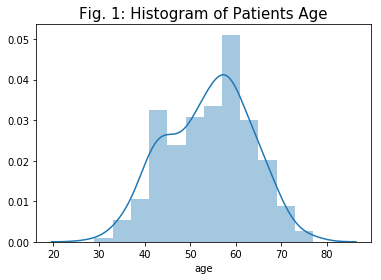

In [22]:
sns.distplot(heart_new['age'], kde = True).set_title('Fig. 1: Histogram of Patients Age', fontsize = 15)
plt.show();

### Plot 2 : Types of chest pain experienced by people

From the bar plot, it is observed that higher number of people experience asymptomatic chest pain i.e. majority do not show any symptoms of pain in chest. Typical angina which is severe chest pain is experienced by least number of people

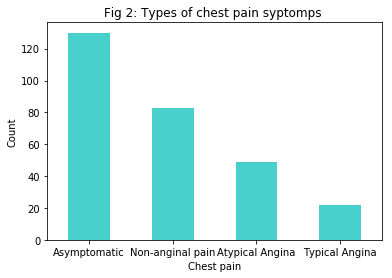

In [23]:
viz1=heart_new['cp'].value_counts(normalize=False).plot(kind='bar',color='mediumturquoise', figsize=(6,4))
viz1.set_xticklabels(viz1.get_xticklabels(),rotation=360)
plt.ylabel("Count")
plt.xlabel("Chest pain")
plt.title("Fig 2: Types of chest pain syptomps ")
plt.show()

### Plot 3 : Fasting Blood sugar levels observed in people

Observing bar plot distribution of fasting blood sugar levels we can see that the number of patients having high blood pressure (greater than 120 mg/dl) and with chances of being diabetic are four times that of people having fasting blood pressure of less than 120 mg/dl.

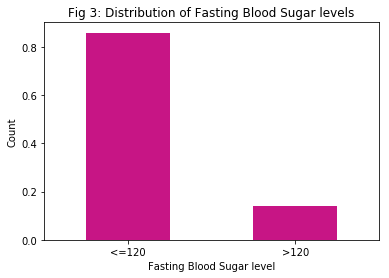

In [24]:
viz2=heart_new['fbs'].value_counts(normalize= True).plot(kind='bar',color='mediumvioletred', figsize=(6,4))
viz2.set_xticklabels(viz2.get_xticklabels(),rotation=360)
plt.ylabel("Count")
plt.xlabel("Fasting Blood Sugar level")
plt.title("Fig 3: Distribution of Fasting Blood Sugar levels")
plt.show()

### Plot 4 : Exercise Induced Angina experienced by people

We compare the frequency of patients who experience pain in chest due to physical activity stress. It is observed that around 70 percent of the patients do not experience exercise induced angina. 

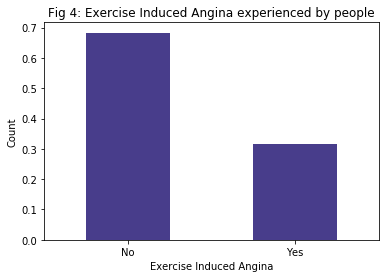

In [25]:
viz3=heart_new['exang'].value_counts(normalize=True).plot(kind='bar',color='darkslateblue', figsize=(6,4))
viz3.set_xticklabels(viz3.get_xticklabels(),rotation=360)
plt.ylabel("Count")
plt.xlabel("Exercise Induced Angina")
plt.title("Fig 4: Exercise Induced Angina experienced by people")
plt.show()

## Bivariate Visualizations

Looking at relationships between features

### Plot 1: Maximum Heart Rate achieved by Age

Observing comparing maximum heart rate recorded for patient across different ages it is observed that as age increases the maximum heart recorded decreases. This may be an indicator that with increase in age heart doesn't work as hard and may not be as healthy

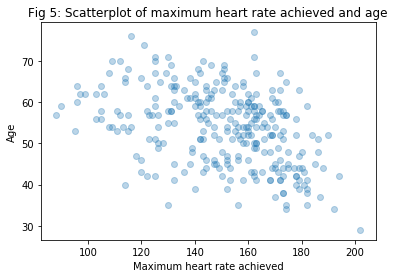

In [26]:
# store the values of hours-per-week
maxheartrate = heart_new['thalach']
# get a scatter plot
plt.scatter(maxheartrate, heart_new['age'], alpha = 0.3)
plt.title('Fig 5: Scatterplot of maximum heart rate achieved and age')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Age')
plt.show();

### Plot 2: Gender-wise Age Distribution

Understanding more about the data, the boxplot shows that the number of average age of female patients is slightly higher than the average age of male patients.

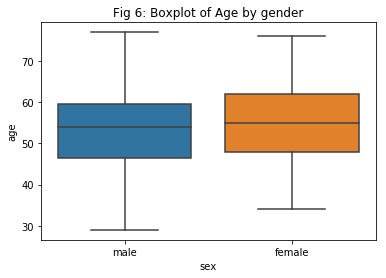

In [27]:
sns.boxplot(heart_new['sex'], heart_new['age']);
plt.title('Fig 6: Boxplot of Age by gender')
plt.show();

### Plot 3: Gender-wise distribution of people who experience Exercise induced Angina

After normalizing the gender distribution, we observing that higher number of males tend to have angina i.e. pain induced due to physical stress than females.  

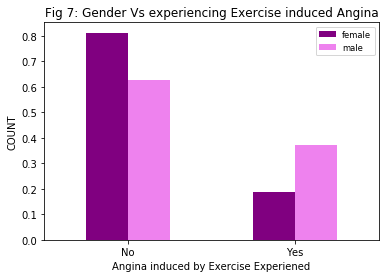

In [28]:
%matplotlib inline
rel1=pd.crosstab(index=heart_new['exang'], columns=heart_new['sex'],normalize='columns')
rel1.head()
rel1.plot(kind='bar',stacked= False,color=['purple','violet'],figsize=(6,4))
plt.xticks(rotation=360)
plt.title("Fig 7: Gender Vs experiencing Exercise induced Angina")
plt.ylabel("COUNT")
plt.xlabel("Angina induced by Exercise Experiened")
plt.legend(fontsize='small')
plt.show()

### Plot 4: Fasting Blood Sugar level Vs Type of Chest Pain

Comparing distribution of people experiencing different types of chest pain and their fasting blood sugar levels it is observed that patients experiencing severe chest pain i.e. typical angina have normal (i.e. less than 120 mg/dl) fasting blood sugar level. Additionally, people not showing signs of chest pain can have high fasting blood sugar level.

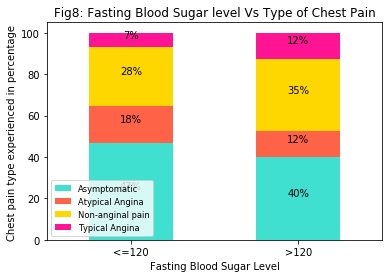

In [29]:
viz= pd.crosstab(index=heart_new['fbs'], columns=heart_new['cp']).apply(lambda r: r/r.sum()*100, axis=1)
viz_4 = viz.plot.bar(stacked=True, color=['turquoise','tomato','gold','deeppink'],figsize=(6,4))
viz_4.set_xticklabels(viz_4.get_xticklabels(),rotation=360)
plt.legend(fontsize='small')
plt.title("Fig8: Fasting Blood Sugar level Vs Type of Chest Pain")
plt.ylabel("Chest pain type experienced in percentage ")
plt.xlabel("Fasting Blood Sugar Level")

for rec in viz_4.patches:
    height = rec.get_height()
    viz_4.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

## Multivariate Visualizations

Looking at inter-relationships between multiple descriptive features

### Plot 1: Correlation between the numeric features

We display a heatmap between all the numeric variables to see the level correlation between them. It is observed they aren't highly correlated but the highest correlation is found between maximum eart rate achieved(thalach) and age. they are negatively correlated. There seems to be almost no correlation between serum cholesterol(chol) and ST depression induced by exercise relative to rest(oldpeak).

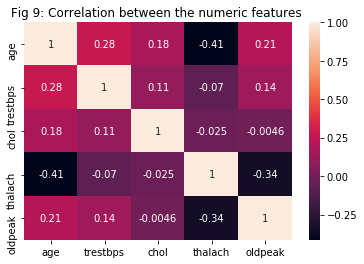

In [30]:
corr_matrix = heart_new.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Fig 9: Correlation between the numeric features ')
plt.show()

### Plot 2: Comparison chest pain type by gender and age

From the below boxplot it is observed that patient who experience acute chest pain i.e. typical angina are mostly females older in age. Males and females of younger ages tend to experience Atypical angina. 

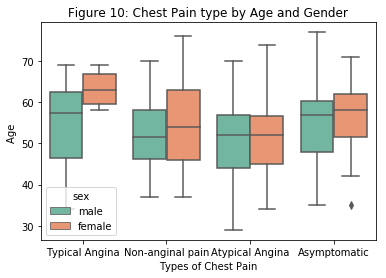

In [31]:
sns.boxplot(heart_new['cp'], heart_new['age'], hue = heart_new['sex'], palette="Set2")
plt.title('Figure 10: Chest Pain type by Age and Gender')
plt.ylabel("Age ")
plt.xlabel("Types of Chest Pain")
plt.show();

### Plot 3: Gender-Age wise distribution of maximum heart rate achieved

From scatter plot it is observed that increase in maximum heart rate achieved is negatively related to age. Looking at genderwise distribution it is more number of females have higher maximum heart rate.

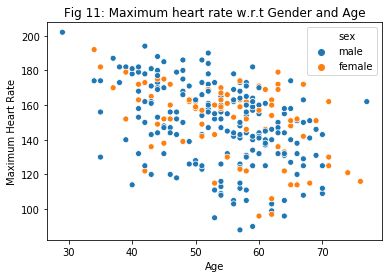

In [32]:
sns.scatterplot(heart_new['age'], heart_new['thalach'], hue = heart_new['sex'])
plt.title('Figure 10: Chest Pain type by Age and Gender')
plt.ylabel("Maximum Heart Rate")
plt.xlabel("Age")
plt.title('Fig 11: Maximum heart rate w.r.t Gender and Age', fontsize = 12);
plt.legend(loc = 'upper right')
plt.show();

### Plot 4 : Comparing the recorded ECG by gender and age

From the below boxplot it is observed that female patients with older in age tend to show ST-T wave abnormality.No male was recorded with this abnormality. Moreover female patients of younger ages display left hypertrophy.

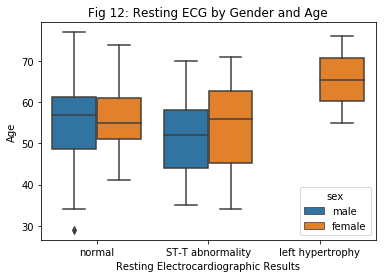

In [33]:
sns.boxplot(heart_new['restecg'], heart_new['age'], hue = heart_new['sex'])
plt.ylabel("Age")
plt.xlabel("Resting Electrocardiographic Results")
plt.title('Fig 12: Resting ECG by Gender and Age', fontsize = 12);
plt.show();

## Preparing data for modeling

## Encoding the Target feature

We remove the "target" feature from the dataset and keep it separately. The other descriptive features are stored as 'heart_target_encoded'.

In [34]:
heart_target_encoded = heart_new.drop(columns='target')
target = heart_new['target']
target.value_counts()

disease       159
no disease    125
Name: target, dtype: int64

Appropriately encoding the target feature taking the positive class as "disease" and encoding it as "1"

In [35]:
target = target.replace({'no disease': 0, 'disease': 1})
target.value_counts()

1    159
0    125
Name: target, dtype: int64

## Encoding the Categorical Variables 

The slope of the peak exercise ST segment(slope) and fasting blood sugar levels(fbs) are ordinal categorical features and therefore, are encoded using integer-encoding method.

In [36]:
levelmapping_fbs = {'>120':0,'<=120':1}
levelmapping_slope = {'down':0,'flat':1,'up':2}

In [37]:
heart_integer = heart_target_encoded.copy()
heart_integer['fbs'] = heart_integer['fbs'].replace(levelmapping_fbs)
heart_integer['slope'] = heart_integer['slope'].replace(levelmapping_slope)
heart_integer.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,Typical Angina,145,233,0,normal,150,No,2.3,0,0,fixed defect
1,37,male,Non-anginal pain,130,250,1,ST-T abnormality,187,No,3.5,0,0,normal
2,41,female,Atypical Angina,130,204,1,normal,172,No,1.4,2,0,normal
3,56,male,Atypical Angina,120,236,1,ST-T abnormality,178,No,0.8,2,0,normal
4,57,female,Asymptomatic,120,354,1,ST-T abnormality,163,Yes,0.6,2,0,normal


The remaining categorical features are all nominal and hence are label encoded using one-hot encoding method.  
`sex`, `cp`, `restecg`, `exang`, `ca`, `thal` are the remaining descriptive features relabelled. 


In [38]:
# get the list of categorical descriptive features
categorical_cols = heart_integer.columns[heart_integer.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(heart_integer[col].unique())
    if (n == 2):
        heart_integer[col] = pd.get_dummies(heart_integer[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
heart_onehot = pd.get_dummies(heart_integer)

In [39]:
categorical_cols

['sex', 'cp', 'restecg', 'exang', 'ca', 'thal']

In [40]:
heart_onehot.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,cp_Asymptomatic,cp_Atypical Angina,cp_Non-anginal pain,cp_Typical Angina,restecg_ST-T abnormality,restecg_left hypertrophy,restecg_normal,ca_0,ca_1,ca_2,ca_3,ca_4,thal_fixed defect,thal_missing,thal_normal,thal_reversible defect
0,63,1,145,233,0,150,0,2.3,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0
1,37,1,130,250,1,187,0,3.5,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,1,172,0,1.4,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,1,178,0,0.8,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,1,163,1,0.6,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [41]:
heart_onehot.shape

(284, 25)

After encoding the categorical features, all descriptive features are now numeric. There are 25 features now. As the range of the columns vary we will scale the features. Scaling is done using the min-max scaling method. 

## Scaling of Features

In [42]:
from sklearn import preprocessing

heart_df = heart_onehot.copy()
heart_scaler = preprocessing.MinMaxScaler()
heart_scaler.fit(heart_onehot)
heart_onehot = heart_scaler.fit_transform(heart_onehot)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
pd.DataFrame(heart_onehot, columns=heart_df.columns).sample(5, random_state=999)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,cp_Asymptomatic,cp_Atypical Angina,cp_Non-anginal pain,cp_Typical Angina,restecg_ST-T abnormality,restecg_left hypertrophy,restecg_normal,ca_0,ca_1,ca_2,ca_3,ca_4,thal_fixed defect,thal_missing,thal_normal,thal_reversible defect
134,0.458333,0.0,0.342105,0.722222,1.0,0.605263,0.0,0.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.604167,0.0,0.078947,0.521368,1.0,0.298246,0.0,0.25,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85,0.520833,0.0,0.210526,0.376068,1.0,0.614035,0.0,0.40,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.583333,1.0,0.736842,0.179487,1.0,0.754386,0.0,0.40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,0.625000,1.0,1.000000,0.854701,1.0,0.456140,1.0,0.85,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


For modeling the we separate features in 'Data' pandas dataframe and 'target' dataframe. The data is now prepared and ready for modeling.

In [44]:
# Copying for modelling purpose
Data = pd.DataFrame(heart_onehot).values
target = pd.DataFrame(target).values

# Feature Selection and Ranking <a name="fs"></a>

In this section, to gain some insight of the data we would assess the performance of most relevant 10 features in the dataset and determine their importance/ranking as selected by the Random Forest Importance (RFI) .For this purpose, as wrapper, 1-nearest neighbor classifier is used and Repeatedstratified 5-fold cross-validation with 3 repetitions is implemented. <br>
Also it must be noted that,further in the Hyperparameter tuning phase,we would include Random Forest Importance (RFI) as a part of pipeline to determine which number of features works optimal for each specific classifier,a comparison between 5,10 and a full set of 25 features is made to acquire relevant results. 

In [45]:
scoring_metric='accuracy'

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [47]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [48]:
from sklearn.ensemble import RandomForestClassifier
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target.reshape((-1,)))
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [49]:
best_features_rfi = heart_df.columns[fs_indices_rfi].values
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.10315943, 0.0969353 , 0.09232614, 0.08931879, 0.08345146,
       0.07366228, 0.07291019, 0.07097166, 0.0606937 , 0.04875427])

In [50]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:,fs_indices_rfi],
                             y=target.reshape((-1,)), 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.778

In [51]:
import altair as alt

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.85, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

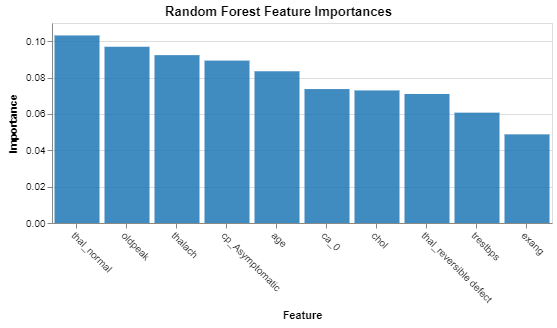

In [52]:
alt.renderers.enable('notebook')
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', '#1f77b4')

From figure,we observe the features ordered in terms of their importance.

# Data Splitting – Train Test <a name="dsplit"></a>

In this section, our aim is to achieve the Data for modelling, for this purpose initially we split our dataset consisting of 284 rows into two groups, i.e. training and test, the former would be used for model fitting and to train the model and the later for validating the model. <br>
Prior to this, we use values attribute to convert the Data and target Pandas data frames into a NumPy array.<br>
**Hold out approach** is used to split the data into train and test partitions in a 70:30 proportion using stratification.furthermore,the random state is set to 999 to ensure that our results remain consistent.

In [53]:
Data= pd.DataFrame(heart_onehot).values
target = pd.DataFrame(target).values

print(Data.shape)
print(target.shape)

(284, 25)
(284, 1)


In [54]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data, target, test_size = 0.3, random_state=999,stratify = target)
print(D_train.shape)
print(D_test.shape)

(198, 25)
(86, 25)


# Predictive Modeling and Hyperparameter Tuning <a name="pml"></a>

In this section, we perform **Repeated Stratified K-fold Crossvalidation**, we use 5-fold stratified cross-validation evaluation method with 3 repetitions  for hyperparameter tuning which accounts for a total of 15 runs.

In [55]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

### Feature selection using Random Forest importance

Random Forest Importance (RFI) method with 100 estimators is used for feature selection.The following function would aid us to include RFI feature selection as part of the pipeline in the later stage.

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

### Formatting grid search outputs as a Pandas data frame

The following function would aid us to format the grid search outputs as a Pandas data frame.

In [57]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

### Defining the Scoring metric

For scoring, we use the accuracy score.Thus, we define our scoring metric as **accuracy**.

In [58]:
scoring_metric='accuracy'

### Pipeline

**Pipeline methodology** is used to combine feature selection with hyperparameter tuning. This procedure is used in all our Classifiers namely, K-Nearest Neighbours,Naive Bayes,Decision Tree,Random Forest and Support Vector Machine.

## Model Fitting

### K-Nearest Neighbors (KNN)

For K-nearest neighbor model, the hyperparameters are as follows: <br>
**Number of neighbors (knn__n_neighbors)** = 1,2,3,4,5 <br>
**Distance Metric (knn__p)**: Manhattan (p=1), Euclidean (p=2) and Minkowski (p=3 and p=4). <br>

Let's start with defining the pipeline.

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
                   'knn__n_neighbors': [1, 2, 3, 4, 5],
                   'knn__p': [1,2,3,4]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring=scoring_metric,
                           verbose=1) 

Post defining the pipeline we move further and fit our data. <br> 
Note that the grid search accounts for 1 x 3 x 5 x 4 = 60 different parameter combinations.

In [60]:
%%capture
gs_pipe_KNN.fit(D_train, t_train);

Post fitting, lets determine the best parameters obtained.

In [61]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 5, 'knn__p': 3, 'rfi_fs__n_features_': 10}

In [62]:
gs_pipe_KNN.best_estimator_

Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='uniform'))])

We infer that the best performing KNN model selected 10 features with 5 nearest neighbors and  p=3 , which is the Minkowsi distance.

Next, let us determine the score of the optimal model.

In [63]:
gs_pipe_KNN.best_score_

0.8468013468013468

From the result, we infer that the optimal KNN model gives a **mean Accuracy score of 0.85**.

Next let us compare this procured best value with other parameter combinations to determine if there are any significant difference amongst them.

In [64]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN = pd.DataFrame(results_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
55,0.846759,0.051959,0.948718,0.769231,5.0,3.0,10.0
49,0.843713,0.042230,0.923077,0.756098,5.0,1.0,10.0
43,0.841841,0.050026,0.923077,0.743590,4.0,3.0,10.0
40,0.838463,0.047069,0.923077,0.769231,4.0,2.0,10.0
52,0.838176,0.062985,0.948718,0.725000,5.0,2.0,10.0


From the above results, we infer that the difference between the Mean Accuracy scores of the hyperparameter combinations is nearly insignificant, when constrained on the number of features selected. <br>

To get a better understanding of this result we plot them with respect to 10 selected features(as this provides us the best performing model).

In [65]:
plotresultsrf=results_KNN[['mean_score', 'rfi_fs__n_features_','knn__n_neighbors','knn__p']]
plotresultsrf['metric'] = results_KNN['knn__p'].replace([1,2,3,4], ["Manhattan", "Euclidean", "Minkowski","Minkowski_4"])
plotresultsrf.sort_values(by='mean_score',ascending=False)
plotresultsrf.head()

,mean_score,rfi_fs__n_features_,knn__n_neighbors,knn__p,metric
55,0.846759,10.0,5.0,3.0,Minkowski
49,0.843713,10.0,5.0,1.0,Manhattan
43,0.841841,10.0,4.0,3.0,Minkowski
40,0.838463,10.0,4.0,2.0,Euclidean
52,0.838176,10.0,5.0,2.0,Euclidean


Visualizing the results corresponding to 10 selected features.

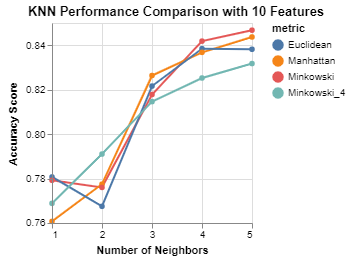

In [66]:
import altair as alt
alt.renderers.enable('notebook')
results_KNN_10_features = plotresultsrf[plotresultsrf['rfi_fs__n_features_'] == 10.0]
alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    color='metric'
)

The plot below above, we infer that K = 5 with the Minkowski distance metric (p=3) outperforms other combinations.

### Naive Bayes

In this section we implement a Gaussian Naive Bayes model. For this purpose, we optimize the parameter var_smoothing, for which we perform a grid search in the logspace over the powers of 10, starting 10 up till 10^(-9) with 200 different values. <br>
Furthermore, prior to the implementation of this model, we would power transform each descriptive feature in our input data to ensure that it follows a Gaussian distribution.

Let's start with power transforming the input data.

In [67]:
from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(D_train)

In this section, we would define the pipeline.

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-9, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring=scoring_metric,
                          n_iter=n_iter_search,
                          verbose=1) 

Post defining the pipeline we move further and fit our data.

In [69]:
%%capture
gs_pipe_NB.fit(Data_sample_train_transformed, t_train);

Post fitting, lets determine the best parameters obtained.

In [70]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 25, 'nb__var_smoothing': 1.7629141180959476}

In [71]:
gs_pipe_NB.best_estimator_

Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=25)), ('nb', GaussianNB(priors=None, var_smoothing=1.7629141180959476))])

We infer that the best performing NB model selected 25 features (all features) with var_smoothing=1.763.

Next, let us determine the score of the optimal model.

In [72]:
gs_pipe_NB.best_score_

0.8333333333333334

From the result, we infer that the optimal NB model gives a **mean Accuracy score of 0.83**.

Next let us compare this procured best value with other parameter combinations to determine if there are any significant difference amongst them.

In [73]:
results_NB = get_search_results(gs_pipe_NB)
results_NB = pd.DataFrame(results_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
17,0.833458,0.044610,0.923077,0.769231,25.0,1.762914
8,0.825080,0.052940,0.948718,0.743590,25.0,0.109699
2,0.824789,0.058190,0.923077,0.692308,10.0,2.221947
3,0.816698,0.047702,0.923077,0.743590,25.0,0.015344
5,0.804696,0.039885,0.871795,0.717949,10.0,0.439760


From the above results, we infer that the difference between the Mean Accuracy scores of the hyperparameter combinations is somewhat significant, when constrained on the number of features selected.

To get a better understanding of this result we plot them with respect to 25 (all features) selected features(as this provides us the best performing model).

In [74]:
plotresultsnb=results_NB[['mean_score', 'rfi_fs__n_features_','nb__var_smoothing']]
plotresultsnb.sort_values(by='mean_score',ascending=False)
plotresultsnb.head()

,mean_score,rfi_fs__n_features_,nb__var_smoothing
17,0.833458,25.0,1.762914
8,0.825080,25.0,0.109699
2,0.824789,10.0,2.221947
3,0.816698,25.0,0.015344
5,0.804696,10.0,0.439760


Visualizing the results corresponding to 25 selected features.

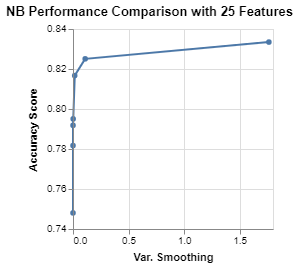

In [75]:
results_NB_25_features = plotresultsnb[results_NB['rfi_fs__n_features_'] == 25.0]

alt.Chart(results_NB_25_features, 
          title='NB Performance Comparison with 25 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='Accuracy Score', scale=alt.Scale(zero=False))
)

The plot below above, we infer that var_smoothing=1.763 outperforms other combinations.

### Decision Tree

The decision tree algorithm was built in 3 steps. This was done to ensure that the correct information gain criterion, depth of tree and number of samples for split were used for simulation.

#### Identifying the criterion

In order to determine the optimal information gain criterion (gini or entropy), a grid search was performed with max_depth values in {1, 2, 3, 4, 5, 6, 7, 8} and min_samples_split values in {2, 3}. This grid search function was fitted on train data.

In [76]:
%%capture
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring=scoring_metric)

gs_DT.fit(D_train, t_train);

The best performing parameter combination and score are as follows:

In [77]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [78]:
gs_DT.best_score_

0.7929292929292929

The result was stored in a new dataframe for visualization.

In [79]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

The resultant parameters were plotted with respect to split criterion and maximum depth while taking the average of min_samples_split parameter.<br>
**Gini Index** was chosen as the optimal information gain criterion.

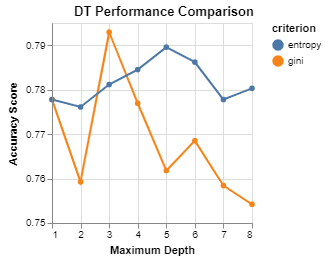

In [80]:
alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Accuracy Score', aggregate='average', scale=alt.Scale(zero=False)),
    color='criterion'
)

#### Hyperparameter Tuning - Step 1

The best performing parameter combination was used with "gini" information gain criterion for fine-tuning the hyperparameters. This task was performed with using 5, 10 and 25 features as per the result from RFI feature selction. Considering the previous result of best performing parameters, a grid search was performed with max_depth values in {3, 5} and min_samples_split values in {2, 3}.

In [81]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=999))])

params_pipe_DT = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
                  'dt__max_depth': [3, 5],
                  'dt__min_samples_split': [2, 3]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring=scoring_metric,
                          verbose=1)

In [82]:
%%capture
gs_pipe_DT.fit(D_train, t_train);

The best performing parameter combination and score are as follows:

In [83]:
gs_pipe_DT.best_params_

{'dt__max_depth': 3, 'dt__min_samples_split': 2, 'rfi_fs__n_features_': 10}

In [84]:
gs_pipe_DT.best_score_

0.8080808080808081

The best decision tree was found to have a maximum depth of 3 and minimum split value of 2 samples with an mean Accuracy score of approximately 0.80. The resultant parameters were  visualized for 10 features.

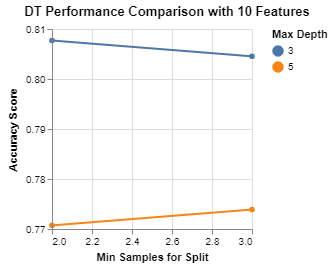

In [85]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

#### Hyperparameter Tuning - Step 2

The optimal value of maximum depth hyperparameter was observed to be at the extreme end of its search space. To make sure that better values were not being missed out on, further fine tuning was performed with 10 features. The grid search was performed with max_depth values in {3, 5, 7} and min_samples_split values in {2, 3, 10, 50}.

In [86]:
%%capture
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [3, 5, 7],
                  'dt__min_samples_split': [2,3,10,50]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring=scoring_metric,
                          verbose=1) 

gs_pipe_DT2.fit(D_train, t_train);

The best performing parameter combination and score are as follows:

In [87]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 3, 'dt__min_samples_split': 10, 'rfi_fs__n_features_': 10}

In [88]:
gs_pipe_DT2.best_score_

0.8080808080808081

In [89]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
2,0.807868,0.072693,0.948718,0.675,3.0,10.0,10.0
0,0.801242,0.072495,0.948718,0.675,3.0,2.0,10.0
1,0.792612,0.075365,0.948718,0.650,3.0,3.0,10.0
6,0.785943,0.078720,0.871795,0.550,5.0,10.0,10.0
10,0.780860,0.087070,0.897436,0.550,7.0,10.0,10.0


It can be seen that a similar score was achieved with a maximum depth of 3 and minimum split value of 10 samples with an mean Accuracy score of 0.81. A visualization of the search results is given below for 10 features.

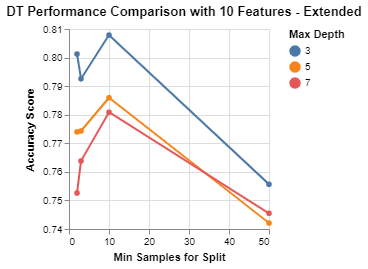

In [90]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

### Random Forest

Next, a random forest algorithm was simulated and fitted on the train data. For fine-tuning, n_estimators values in {100, 250, 500} and max_depth values in {2, 3, 5} were considered as range. The algorithm was simulated for 5, 10 and 25 features as per the results of RFI feature selection.

In [91]:
%%capture
pipe_RF = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('rf', RandomForestClassifier(random_state=999))])

params_pipe_RF = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
                  'rf__n_estimators': [10, 100, 250, 500],
                  'rf__max_depth': [2,3,5,7]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                     param_grid=params_pipe_RF, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=-2,
                     scoring=scoring_metric)

gs_pipe_RF.fit(D_train, t_train);

The best performing parameter combination and score are as follows:

In [92]:
gs_pipe_RF.best_params_

{'rf__max_depth': 2, 'rf__n_estimators': 500, 'rfi_fs__n_features_': 25}

In [93]:
gs_pipe_RF.best_score_

0.8434343434343434

It can be seen that a better score was achieved with a 500 trees,max depth of 2 and using 25 features, giving a mean Accuracy score of 0.84.<br>
The result was stored in a new dataframe for visualization. The resultant parameters were plotted with respect to estimators and maximum depth.

In [94]:
# Let's define a new data frame to store the grid search results for visualization.
results_RF = pd.DataFrame(gs_pipe_RF.cv_results_['params'])
results_RF['test_score'] = gs_pipe_RF.cv_results_['mean_test_score']
results_RF.columns

Index(['rf__max_depth', 'rf__n_estimators', 'rfi_fs__n_features_',
       'test_score'],
      dtype='object')

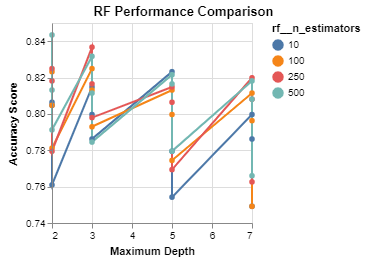

In [95]:
alt.Chart(results_RF, 
          title='RF Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('rf__max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    color='rf__n_estimators:N' # N is for nominal
)

### Support Vector Machine

Support Vector Machine, which is another supervised machine learning algorithm, was used as a classifier using 5, 10 and 25 features as per the results of RFI feature selection. SVM was used to generate and optimal decision plane in an iterative manner for minimizing error. While selecting the values for kernel, linear, polynomial, sigmoid and radial basis function were considered to ensure that all possible transformations are tested on the train data. The values for penalty parameter C (regularization), which represents misclassification error, were considered in the range {10, 25, 50}. This was done to consider all type of gaps between closest class points. Gamma values in {0.01, 0.001,0.0001,0.00001} were considered to check over-fitting.

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svm = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('svm', SVC())])

params_pipe_svm = {'rfi_fs__n_features_': [5, 10, Data.shape[1]],
             'svm__C': [10, 25, 50],
              'svm__gamma': [1e-2, 1e-3, 1e-4,1e-5],
              'svm__kernel': ['linear','rbf', 'poly']}

gs_pipe_svm = GridSearchCV(estimator=pipe_svm, 
                     param_grid=params_pipe_svm, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=-2,
                     scoring=scoring_metric)

In [97]:
%%capture
gs_pipe_svm.fit(D_train, t_train)

The best performing parameter combination and score are as follows:

In [98]:
gs_pipe_svm.best_params_

{'rfi_fs__n_features_': 25,
 'svm__C': 50,
 'svm__gamma': 0.0001,
 'svm__kernel': 'rbf'}

In [99]:
gs_pipe_svm.best_score_

0.8501683501683501

It can be seen that a better score was achieved with a radial bias function kernel, gamma as 0.0001,regularization value as 50 and using 25 features, giving a mean Accuracy score of 0.85.<br>
The result was stored in a new dataframe for visualization. The resultant parameters were plotted with respect to regularization and gamma values.

In [100]:
results_svm = pd.DataFrame(gs_pipe_svm.cv_results_['params'])
results_svm['test_score'] = gs_pipe_svm.cv_results_['mean_test_score']
results_svm.columns

Index(['rfi_fs__n_features_', 'svm__C', 'svm__gamma', 'svm__kernel',
       'test_score'],
      dtype='object')

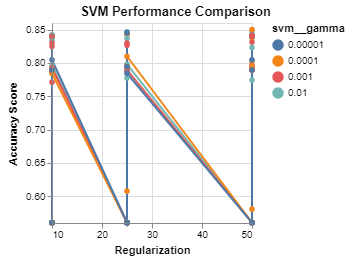

In [101]:
alt.Chart(results_svm, 
          title='SVM Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('svm__C', title='Regularization'),
    alt.Y('test_score', title='Accuracy Score', scale=alt.Scale(zero=False)),
    color='svm__gamma:N' # N is for nominal
)

# Performance Evaluation <a name="pe"></a>

In the above section, we performed hyperparameter tuning on the train set within a cross-validation and determined the best possible hyperparameter values for each of the five classifiers (K-Nearest Neighbors,Naive Bayes,Decision Tree,Random Forest,Support Vector Machine). <br>
<br>
In this section, our aim is to fit each of these tuned classifiers with their respective set of best hyperparameters on the test set in a cross-validation framework, to determine which out of the five tuned classifiers performs optimal on the test set. As the golden rule of Model evaluation is “The data used to evaluate a model must be different from the data used to train it”. Thus, using the test set we are in turn measuring the performance of these tuned classifiers with an unseen dataset which consists of exact same features. <br> 
<br>
For this purpose, we first perform 5-fold stratified cross-validation without any repetitions on each tuned classifier, and proceed further to perform pairwise t-tests for the Accuracy Score to determine if there are any statistically significant difference between the performance of any two (tuned) classifiers.<br>
<br>
The following combinations of (tuned) classifiers are used in this procedure: <br>

KNN vs. NB<br>
KNN vs. DT <br>
KNN vs. RF<br>
KNN vs. SVM<br>
NB vs. DT<br>
NB vs. RF<br>
NB vs SVM<br>
DT vs. RF<br>
DT vs. SVM<br>
RF vs. SVM<br>

In [102]:
# defining 5-fold stratified cross-validation without any repetitions for KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method_ttest = StratifiedKFold(n_splits=5, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test.reshape((-1,)), 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring=scoring_metric)
KNN_mean=cv_results_KNN.mean()

In [103]:
# For Naive Bayes power transforming test data
D_test_transformed = PowerTransformer().fit_transform(D_test)
# Defining 5-fold stratified cross-validation without any repetitions for NB
Data_sample_test_transformed = PowerTransformer().fit_transform(D_test)
cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=D_test_transformed,
                                y=t_test.reshape((-1,)), 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring=scoring_metric)
NB_mean=cv_results_NB.mean()

In [104]:
# Defining 5-fold stratified cross-validation without any repetitions for DT
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=D_test,
                                y=t_test.reshape((-1,)), 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring=scoring_metric)
DT_mean=cv_results_DT.mean()

In [105]:
# Defining 5-fold stratified cross-validation without any repetitions for RF
cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                X=D_test,
                                y=t_test.reshape((-1,)), 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring=scoring_metric)
RF_mean=cv_results_RF.mean()

In [106]:
# Defining 5-fold stratified cross-validation without any repetitions for SVM
cv_results_SVM = cross_val_score(estimator=gs_pipe_svm.best_estimator_,
                                X=D_test,
                                y=t_test.reshape((-1,)), 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring=scoring_metric)
svm_mean=cv_results_SVM.mean()

Let us have a look at the average means of all our classifiers:

In [107]:
MeanCompare={'Model':["K-Nearest Neighbours", "Decision Tree","Random Forest","Naive Bayes", "SVM"],
                'Mean':[KNN_mean.round(3),DT_mean.round(3),RF_mean.round(3),NB_mean.round(3),svm_mean.round(3)]}
MeanCompare = pd.DataFrame(MeanCompare)
MeanCompare.sort_values(by='Mean',ascending=False)

,Model,Mean
2,Random Forest,0.828
0,K-Nearest Neighbours,0.806
3,Naive Bayes,0.792
1,Decision Tree,0.661
4,SVM,0.558


As per the above table, we infer that with respect to the test set Random Forest classifier provides the maximum mean in terms of accuracy followed by KNN  and Naive Bayes which are pretty close to the prior.

## Paired T-test

Post the performing 5-fold stratified cross-validation without any repetitions on each tuned classifier with test data,let's proceed further and perform (paired) t-tests,using the stats.ttest_rel function.

In [108]:
from scipy import stats
KNN_NB=stats.ttest_rel(cv_results_KNN, cv_results_NB)
KNN_DT=stats.ttest_rel(cv_results_KNN, cv_results_DT)
KNN_RF=stats.ttest_rel(cv_results_KNN, cv_results_RF)
KNN_SVM=stats.ttest_rel(cv_results_KNN, cv_results_SVM)
NB_DT=stats.ttest_rel(cv_results_NB, cv_results_DT)
NB_RF=stats.ttest_rel(cv_results_NB, cv_results_RF)
NB_SVM=stats.ttest_rel(cv_results_NB, cv_results_SVM)
DT_RF=stats.ttest_rel(cv_results_DT, cv_results_RF)
DT_SVM=stats.ttest_rel(cv_results_DT, cv_results_SVM)
RF_SVM=stats.ttest_rel(cv_results_RF, cv_results_SVM)

In [109]:
pairedresult={'Pair':["KNN_NB", "KNN_DT","KNN_RF","KNN_SVM","NB_DT","NB_RF","NB_SVM","DT_RF","DT_SVM","RF_SVM"],
                'P-Value':[KNN_NB[1].round(3),KNN_DT[1].round(3),KNN_RF[1].round(3),KNN_SVM[1].round(3),NB_DT[1].round(3),NB_RF[1].round(3),NB_SVM[1].round(3),
                           DT_RF[1].round(3),DT_SVM[1].round(3),RF_SVM[1].round(3)]}
pairedresult = pd.DataFrame(pairedresult)
pairedresult

,Pair,P-Value
0,KNN_NB,0.650
1,KNN_DT,0.114
2,KNN_RF,0.178
3,KNN_SVM,0.009
4,NB_DT,0.102
5,NB_RF,0.071
6,NB_SVM,0.008
7,DT_RF,0.064
8,DT_SVM,0.020
9,RF_SVM,0.005


It must be noted that a p-value smaller than 0.05 indicates a statistically significant difference. <br>
Looking at above results, we infer that at 95% significance level,in terms of Accuracy there is a significant difference between the following classifier pairs. <br>
* KNN vs. SVM <br>
* DT vs. SVM <br>
* NB vs. SVM <br>
* RF vs. SVM 

## Classification Report

Although Accuracy was used to optimize the algorithm hyperparameters in the above procedures ,in this section we would also calculate various other performance metrics to affirm the best model and evaluate these classifiers based on the test set. <br>
<br>
Following performance metrics will be considered:<br>
<br>
*Precision<br>
Recall<br>
F1 Score<br>
Confusion Matrix*

#### ***Confusion Matrix*** 
The confusion matrices for each of the classifiers are displayed below.

In [110]:
from sklearn import metrics
# power transforming test data power for Naive bayes
D_test_transformed = PowerTransformer().fit_transform(D_test)
t_pred_NB = gs_pipe_NB.predict(D_test_transformed)
t_pred_KNN = gs_pipe_KNN.predict(D_test)
t_pred_DT = gs_pipe_DT2.predict(D_test)
t_pred_RF = gs_pipe_RF.predict(D_test)
t_pred_svm = gs_pipe_svm.predict(D_test)

print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, t_pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, t_pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, t_pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(t_test, t_pred_RF))
print("\nConfusion matrix for Support Vector Machine") 
print(metrics.confusion_matrix(t_test, t_pred_svm))


Confusion matrix for K-Nearest Neighbor
[[29  9]
 [ 8 40]]

Confusion matrix for Naive Bayes
[[30  8]
 [ 5 43]]

Confusion matrix for Decision Tree
[[29  9]
 [10 38]]

Confusion matrix for Random Forest
[[29  9]
 [ 5 43]]

Confusion matrix for Support Vector Machine
[[30  8]
 [ 6 42]]


#### *Classification report *
Classification report for each of the classifiers are displayed below.

In [111]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test, t_pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(t_test, t_pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test, t_pred_DT))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(t_test, t_pred_RF))
print("\nClassification report for SVM") 
print(metrics.classification_report(t_test, t_pred_svm))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.82      0.83      0.82        48

   micro avg       0.80      0.80      0.80        86
   macro avg       0.80      0.80      0.80        86
weighted avg       0.80      0.80      0.80        86


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        38
           1       0.84      0.90      0.87        48

   micro avg       0.85      0.85      0.85        86
   macro avg       0.85      0.84      0.85        86
weighted avg       0.85      0.85      0.85        86


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.81      0.79      0.80        48

   micro avg       0.78      0.78      0.78        86
  

For doctors predicting the presence of heart disease is crucial as this would help them take necessary precautions and patients will be more health conscious. So the recall score (TPR), which is the fraction of true positives identified correctly, the algorithms were ranked in order of performance.

In [112]:
KNN_recall=metrics.recall_score(t_test, t_pred_KNN)
NB_recall=metrics.recall_score(t_test, t_pred_NB)
DT_recall=metrics.recall_score(t_test, t_pred_DT)
RF_recall=metrics.recall_score(t_test, t_pred_RF)
svm_recall=metrics.recall_score(t_test, t_pred_svm)

In [113]:
recall_compare={'Model':["K-Nearest Neighbours", "Naive Bayes","Decision Tree","Random Forest", "SVM"],
                'Recall':[KNN_recall.round(3),NB_recall.round(3),DT_recall.round(3),RF_recall.round(3),svm_recall.round(3)]}
recall_compare = pd.DataFrame(recall_compare)
recall_compare.sort_values(by='Recall',ascending=False)

,Model,Recall
1,Naive Bayes,0.896
3,Random Forest,0.896
4,SVM,0.875
0,K-Nearest Neighbours,0.833
2,Decision Tree,0.792


As per the above, results we observe that in terms of scoring metric **Recall**, Random forest and Naive Bayes are the leading classifiers, followed by SVM. <br>

# Summary and Limitations <a name="sl"></a>

The following investigation procedures were successfully performed, in order to predict the presence of cardiovascular disease in a person: <br>
•	Data preprocessing<br>
•	Data visualisation<br>
•	Predictive modelling<br>
<br>
The data was cleaned, scaled and encoded for predictive modelling. The resultant data was fed to 5 algorithms, i.e. KNN, Naïve Bayes, Decision Tree, Random Forest and Support Vector Machine. The hyper-parameters were individually fine-tuned for every algorithm and the best set of parameters were obtained. The “accuracy” scoring metric was used for every algorithm for consistency and comparison. Feature selection and grid search were combined for parameter tuning using Pipeline. <br>
<br>
The following accuracy scores were obtained on train data for the simulated algorithms:<br>
•	KNN: 85%<br>
•	Naïve Bayes: 83%<br>
•	Decision Tree: 81%<br>
•	Random Forest: 84%<br>
•	SVM: 85%<br>
<br>
It was observed that Random Forest out performed with respect to its counterparts while using accuracy performance metric, followed by KNN and Naive Bayes which weren’t too far behind in magnitude.  <br>
For model selection, paired t-tests were performed on model pairs and as few of the obtained p-values were found to be smaller than 95% significance level, which indicated statistically significant differences between the algorithm pairs, namely, KNN vs. SVM, DT vs. SVM,NB vs. SVM and RF vs. SVM.
Inline with the primary objective, Recall (TPR) was the preferred performance metric for selecting the final model. <br>
The Recall metric confirmed that the Random Forest and Naive Bayes Algorithms performed the best. <br>
Evaluating the performance of all the models with respect to both the metrics namely; **Accuracy** and **Recall**,**Random Forest** with hyperparameters of 500 trees,max depth of 2 and using all 25 features of the data is selected as our best Model.This model would be used to predict the 
for predicting the presence of a cardiovascular disease in a patient and thereby helping doctors diagnose the patient's condition promptly. <br>
<br>
While preparing Data for ML,outliers were treated by removing the observations.This could be leading to some loss of crucial information, which might have been an influential factor in determining the presence of heart disease. <br>

# References <a name="rf"></a>

* Aksakalli, D. V. (2020, May 20). Tutorials. Retrieved from Feature Ranking : https://www.featureranking.com/tutorials/
* Association, A. H. (2020, May 18). Understanding Blood Pressure Readings. Retrieved from American Heart Association: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
* Chest Pain / Angina Pectoris. (2020, May 28). Retrieved from Textbook of Cardiology: https://www.textbookofcardiology.org/wiki/Chest_Pain_/_Angina_Pectoris
* Ghenis, M. (2020, May 20). Adding value labels on a matplotlib bar chart. Retrieved from Stackoverflow: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
* Marie10. (2020, May 21). Display percent of 100 in stacked bar plot from crosstab from matplotlib in pandas [duplicate]. Retrieved from Stackoverflow: https://stackoverflow.com/questions/57981287/display-percent-of-100-in-stacked-bar-plot-from-crosstab-from-matplotlib-in-pand
* Navlani, A. (2020, May 30). Support Vector Machines with Scikit-learn. Retrieved from Datacamp: www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
* Publishing, H. H. (2020, May 28). Angina: Symptoms, diagnosis and treatments. Retrieved from Harvard Health Publishing: https://www.health.harvard.edu/heart-health/angina-symptoms-diagnosis-and-treatments
* Ronit. (2020, May 18). Heart Disease UCI. Retrieved from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci
